# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

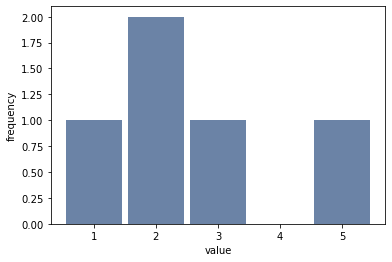

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

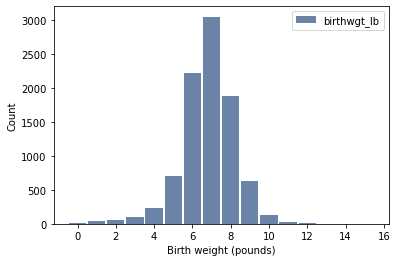

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

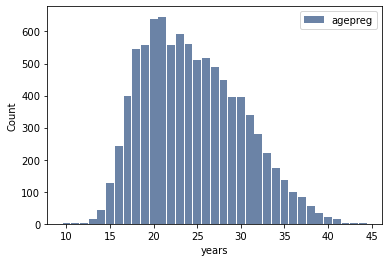

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

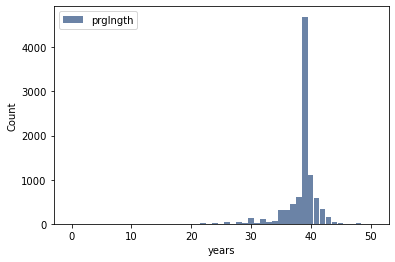

In [23]:
# Answer 1
# Following the code from the histogram example above
'''
ages = np.floor(live.agepreg)
hist = thinkstats2.Hist(ages, label='agepreg')
# thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
'''
preg_length = np.floor(live.prglngth)
hist = thinkstats2.Hist(preg_length, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')


`Hist` provides smallest, which select the lowest values and their frequencies.

In [24]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0.0 1
4.0 1
9.0 1
13.0 1
17.0 2
18.0 1
19.0 1
20.0 1
21.0 2
22.0 7


Use `Largest` to display the longest pregnancy lengths.

In [25]:
# Answer 2
# Following the code above replace Smallest with Largest
'''
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)
'''
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50.0 2
48.0 7
47.0 1
46.0 1
45.0 10
44.0 46
43.0 148
42.0 328
41.0 587
40.0 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [26]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

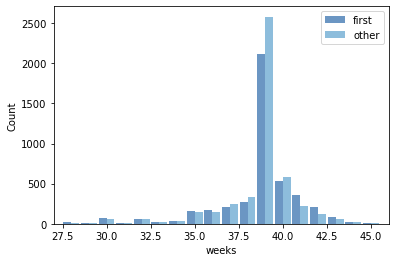

In [27]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [28]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [29]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [31]:
# Answer 3
# Value calculated for std as square root of  variance.
confirm_std = np.sqrt(var)
# Confirmatin the values are the same.
confirm_std == std

True

Here's are the mean pregnancy lengths for first babies and others:

In [32]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [33]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [34]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [35]:
# Answer 4
# Use the function for Cohen's d
# The arguments eill be group 1 = firsts.prglngth and group 2 = others.prglngth
CohenEffectSize(firsts.prglngth, others.prglngth )


0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [36]:
# Answer 5
# To quantify the difference between the groups, the two means will be calculated for column totalwgt_lb.
# The exercise code will be modified: firsts.prglngth.mean(), others.prglngth.mean()
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()
# The results indicate that first babies are, on average, lighter than other babies.
# This result is opposite for pregnancy length considering first borns compared to others.
# However, the effect size is relatively small at -0.089.
# The small effect size is similar between teh two groups, however the direction is opposite.

(7.201094430437772, 7.325855614973262)

In [37]:
# Answer 5 ctd
# Use the function for Cohen's d
# The arguments eill be group 1 = firsts.totalwgt_lb and group 2 = otherstotalwgt_lb
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

For the next few exercises, we'll load the respondent file:

In [38]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

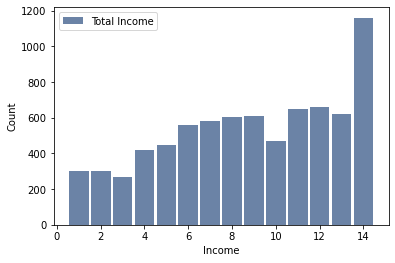

In [42]:
# Answer 6
'''
Will use the code from the histogram exercise and modify for totincr from respondent file
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
'''
hist = thinkstats2.Hist(resp.totincr, label='Total Income')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Income', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

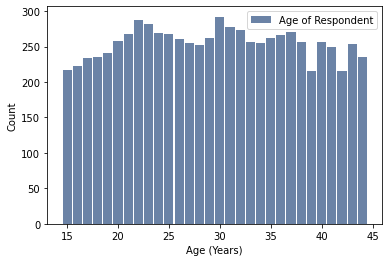

In [43]:
# Answer 7
'''
Will use the code from the histogram exercise and modify for age_r from respondent file
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
'''
hist = thinkstats2.Hist(resp.age_r, label='Age of Respondent')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (Years)', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

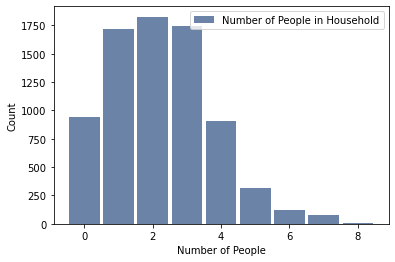

In [44]:
# Answer 8
'''
Will use the code from the histogram exercise and modify for numfmhh from respondent file
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
'''
hist = thinkstats2.Hist(resp.numfmhh, label='Number of People in Household')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of People', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

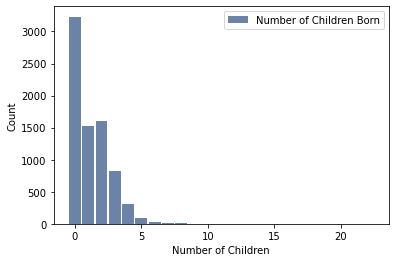

In [45]:
# Answer 9
'''
Will use the code from the histogram exercise and modify for parity from respondent file
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
'''
hist = thinkstats2.Hist(resp.parity, label='Number of Children Born')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Children', ylabel='Count')

# The distribution is positively skewed.


Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [46]:
# Answer 10
# Following the code below from the previous exercise:
'''
for weeks, freq in hist.Largest(10):
    print(weeks, freq)
'''
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

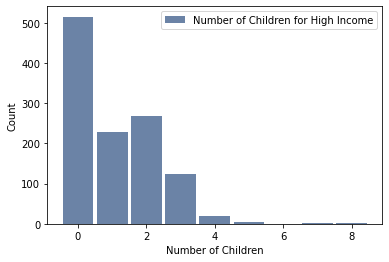

In [47]:
# Answer 11
'''
Will use the code from the histogram exercise and modify for high income (level 14) from respondent file
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
'''
high_income = resp[resp.totincr == 14]
hist = thinkstats2.Hist(high_income.parity, label='Number of Children for High Income')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Children', ylabel='Count')

Find the largest parities for high income respondents.

In [48]:
#  Answer 12
# Following the code below from the previous exercise:
'''
for weeks, freq in hist.Largest(10):
    print(weeks, freq)
'''

for weeks, freq in hist.Largest(10):
    print(weeks, freq)

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [50]:
# Answer 13
# Create a subset of the data for lower_income individuals.
lower_income = resp[resp.totincr < 14]
# Calculate the mean for the high_income and lower_income subgroups.
high_income.parity.mean(), lower_income.parity.mean()


(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [53]:
# Answer 14
# Use the function for Cohen's d
# The arguments eill be group 1 = high_income.parity and group 2 = low_income.parity
CohenEffectSize(high_income.parity, lower_income.parity)

-0.1251185531466061

Exercise 2-4 Summary

In [55]:
# Exercise 2-4 Findings from the Above Exercises
# The Mean was calculated for the two subgroups of data (first babies, non-first babies) in terms of weight
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()
# Cohen's d was calcualted with the function provided below:
'''def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d'''
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

The calculation for the mean turned out to be (7.201094430437772, 7.325855614973262) for the weight of
first babies and non-first babies respectively. This indicates that first babies, on average, tend to be lighter than 
non-first babies. Cohen's d is -0.089 which indicates a small effect size in favor of first babies being lighter than
non-first babies. The small effect size and minor difference in mean weights indicate there are no major differences
for weight in first babies compared to non-first babies.

The calculation for the mean for the pregnancy length turned out to be (38.60095173351461, 38.52291446673706) for
first babies and non-first babies respectively. This indicates that first babies, on average, tend to arrive slightly
later than non-first babies.Cohen's d is 0.029 which indicates a small effect size of first babies arriving slightly later 
than non-first babies. The small effect size and minor difference in mean pregnancy length indicate there are no major differences
for pregnancy length in first babies compared to non-first babies.